In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import joblib


In [ ]:


class RFModel:
    def __init__(self, random_state=50):
        self.best_rf = RandomForestClassifier(
            n_estimators=400,
            min_samples_split=2,
            min_samples_leaf=2,
            max_features='sqrt',
            max_depth=30,
            class_weight=None,
            bootstrap=False,
            random_state=random_state
        )
        self.random_state = random_state

    def fit(self, X_train, y_train):
        self.best_rf.fit(X_train, y_train)
        # joblib.dump(self.best_rf, "best_random_forest_model_fixed.pkl")
        # print("✅ Model trained and saved as 'best_random_forest_model_fixed.pkl'")

    def predict(self, X):
        return self.best_rf.predict(X)

    def print_stats(self, y_test, y_pred):
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        print(f"Accuracy : {acc * 100:.2f}%")
        print(f"Precision: {prec * 100:.2f}%")
        print(f"Recall   : {rec * 100:.2f}%")
        print(f"F1-Score : {f1 * 100:.2f}%")

    def plot_confusion_matrix(self, y_test, y_pred):
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
        plt.title('Confusion Matrix Heatmap', fontsize=14)
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        plt.show()

    def plot_roc_curve(self, X_test, y_test):
        if len(set(y_test)) == 2:
            y_prob = self.best_rf.predict_proba(X_test)[:, 1]
            fpr, tpr, _ = roc_curve(y_test, y_prob)
            roc_auc = auc(fpr, tpr)

            plt.figure(figsize=(6, 4))
            plt.plot(fpr, tpr, color='darkorange', lw=2,
                     label=f'ROC Curve (AUC = {roc_auc:.3f})')
            plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
            plt.title("ROC Curve", fontsize=14)
            plt.xlabel("False Positive Rate")
            plt.ylabel("True Positive Rate")
            plt.legend()
            plt.grid(True, linestyle='--', alpha=0.6)
            plt.show()

            print(f"ROC AUC Score: {roc_auc:.3f}")
        else:
            print("ROC curve only supported for binary classification.")




In [3]:
def run_test():

    df_bots = pd.read_csv("../parsed_data/bots.csv")
    df_bots["bot"] = 1

    df_bots_mv = pd.read_csv("../parsed_data/bots_no_mv_req.csv")
    df_bots_mv["bot"] = 1

    df_hum = pd.read_csv("../parsed_data/human.csv")
    df_hum["bot"] = 0

    df_hum_mv = pd.read_csv("../parsed_data/human_no_mv_req.csv")
    df_hum_mv["bot"] = 0

    df_merged = pd.concat([df_bots, df_hum], ignore_index=True, sort=False)
    df_merged_mv = pd.concat([df_bots_mv, df_hum_mv], ignore_index=True, sort=False)

    X = df_merged.iloc[:, 1:-1].values
    y = df_merged.iloc[:, -1].values
    X_mv = df_merged_mv.iloc[:, 1:-1].values
    y_mv = df_merged_mv.iloc[:, -1].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train_mv, X_test_mv, y_train_mv, y_test_mv = train_test_split(X_mv, y_mv, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    scaler = StandardScaler()
    X_train_mv = scaler.fit_transform(X_train_mv)
    X_test_mv = scaler.transform(X_test_mv)

    rf_classifier = RFModel()
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    rf_classifier.print_stats(y_test, y_pred)
    rf_classifier.plot_confusion_matrix(y_test, y_pred)
    rf_classifier.plot_roc_curve(X_test, y_test)




    rf_classifier_mv = RFModel()
    rf_classifier_mv.fit(X_train_mv, y_train_mv)
    y_pred_mv = rf_classifier_mv.predict(X_test_mv)
    rf_classifier_mv.print_stats(y_test_mv, y_pred_mv)
    rf_classifier_mv.plot_confusion_matrix(y_test_mv, y_pred_mv)
    rf_classifier_mv.plot_roc_curve(X_test_mv, y_test_mv)

✅ Model trained and saved as 'best_random_forest_model_fixed.pkl'
Accuracy : 85.89%
Precision: 82.35%
Recall   : 89.74%
F1-Score : 85.89%


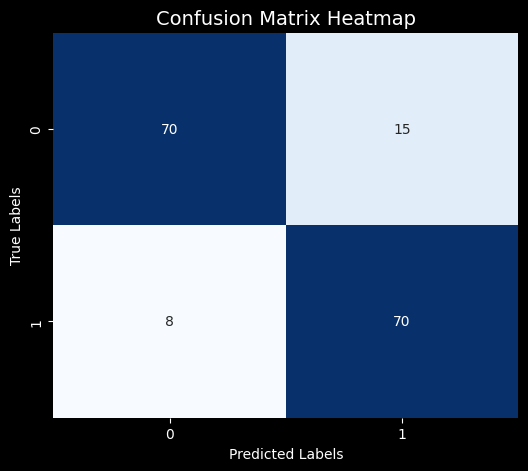

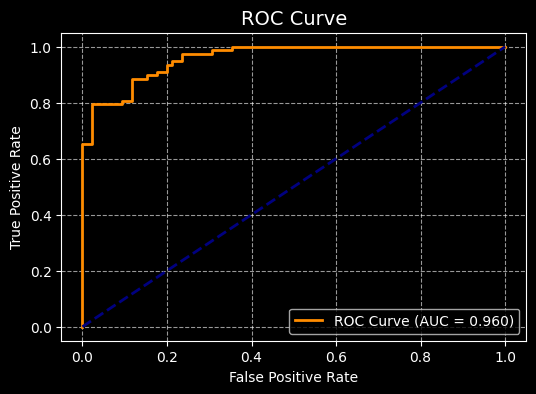

ROC AUC Score: 0.960
✅ Model trained and saved as 'best_random_forest_model_fixed.pkl'
Accuracy : 90.18%
Precision: 87.80%
Recall   : 92.31%
F1-Score : 90.00%


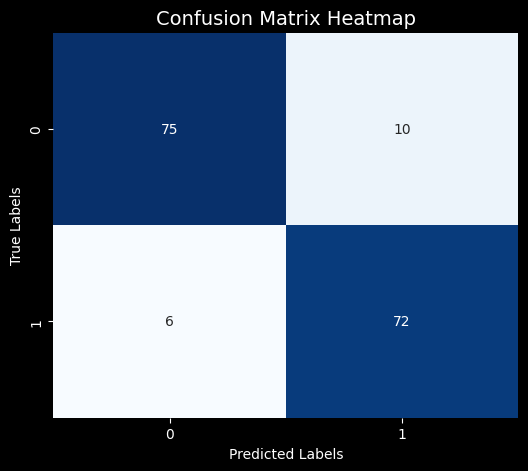

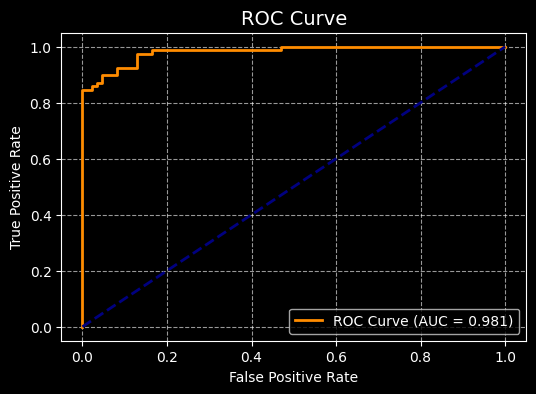

ROC AUC Score: 0.981


In [ ]:
# run_test()